### Import pyscancf
Please cite this library as well as pyart if you are going to use it.

In [ ]:
!pip install git+https://github.com/syedhamidali/PyScanCf.git

In [1]:
from pyscancf import pyscancf as pcf
import matplotlib.pyplot as plt
import pyart

If you are using this software for publication please cite, 
HA Syed, Imran Sayyed, & MCR Kalapureddy. (2021). PyScanCf - 
The library for IMD radar single sweep data (1.0.6). Zenodo. https://doi.org/10.5281/zenodo.5574160
Importing Libraries

## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

Importing Libraries Done


#### load module cfrad and input data directory as well output directory
##### e.g.
##### pcf.cfrad(input_data_dir,output_data_dir)
##### Below I am using same directory for input and output data

In [2]:
pcf.cfrad('H:\\Taukte\\test\\B14','H:\\Taukte\\test\\B14')

Number of files:  20
Total number of files will be created:  2
Merging all scans in one file
Data merging done 
All Done 
Total Time Elapsed:  0:01:15.408037


In [3]:
# Now let's examine the output, first --> Cf-Radial

##### Check the output directory for the desired data, you'll see there are two types of files starting with 'Polar_xyz.nc', and "grid_xyz.nc"

In [4]:
radar = pyart.io.read('Polar_GOA210514203814-IMD-B.nc')

In [5]:
radar.info()

altitude:
	data: <ndarray of type: float32 and shape: (1,)>
	long_name: Altitude
	units: meters
	standard_name: Altitude
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float32 and shape: (3600,)>
	long_name: azimuth_angle_from_true_north
	units: degrees
	standard_name: beam_azimuth_angle
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (3600,)>
	long_name: elevation_angle_from_horizontal_plane
	units: degrees
	standard_name: beam_elevation_angle
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	REF:
		data: <ndarray of type: float32 and shape: (3600, 996)>
		long_name: Reflectivity
		units: dBZ
		standard_name: equivalent_reflectivity_factor
		coordinates: elevation azimuth range
	VELH:
		data: <ndarray of type: float32 and shape: (3600, 996)>
		units: m/s
		standard_name: Radial Velocity
	WIDTH

In [6]:
radar.fields.keys()

dict_keys(['REF', 'VELH', 'WIDTHH', 'TP'])

In [7]:
display = pyart.graph.RadarDisplay(radar)

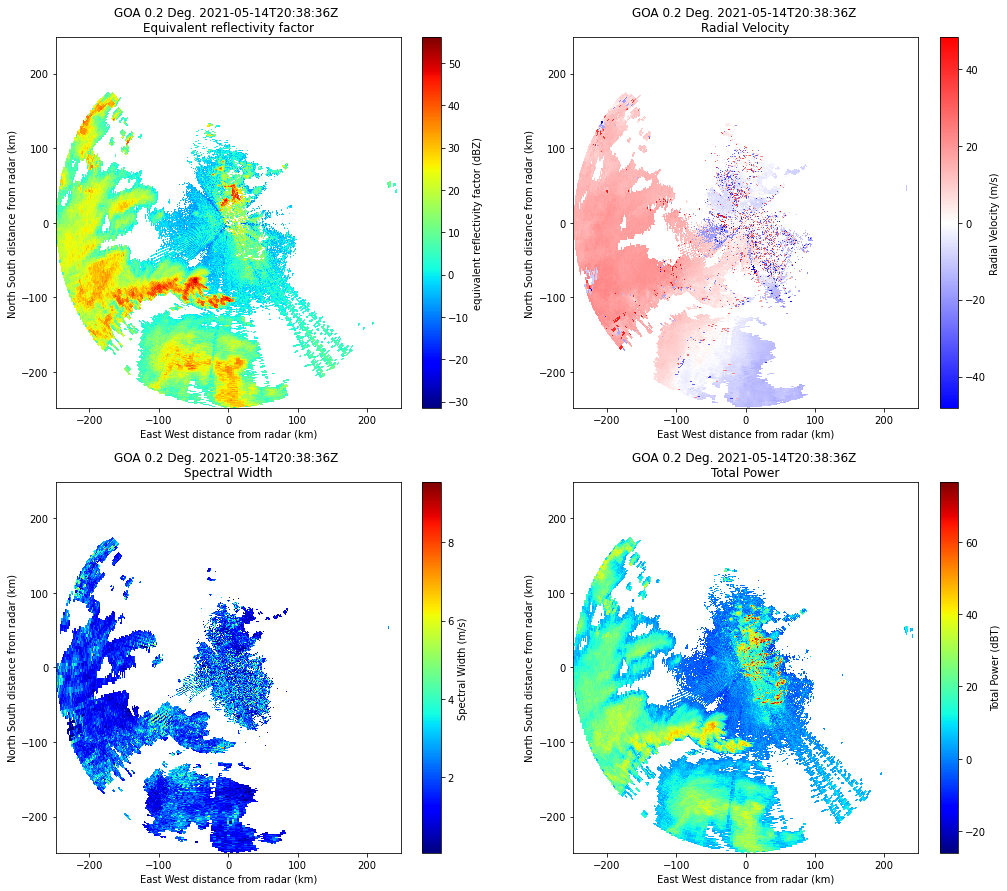

In [8]:
plt.figure(figsize=[17,15])
display.plot('REF',sweep=0,cmap='jet',ax=plt.subplot(221))
display.plot('VELH',sweep=0,cmap='bwr',ax=plt.subplot(222))
display.plot('WIDTHH',sweep=0,cmap='jet',ax=plt.subplot(223))
display.plot('TP',sweep=0,cmap='jet',ax=plt.subplot(224))

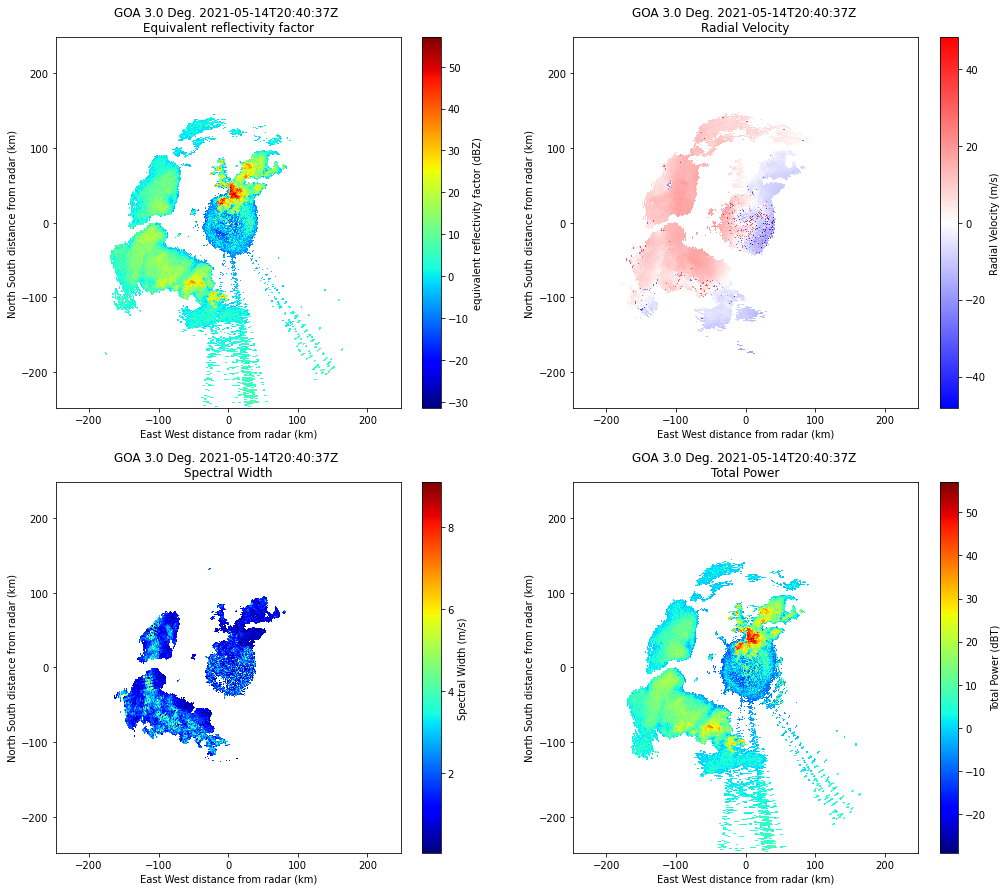

In [38]:
plt.figure(figsize=[17,15])
display.plot('REF',sweep=3,cmap='jet',ax=plt.subplot(221))
display.plot('VELH',sweep=3,cmap='bwr',ax=plt.subplot(222))
display.plot('WIDTHH',sweep=3,cmap='jet',ax=plt.subplot(223))
display.plot('TP',sweep=3,cmap='jet',ax=plt.subplot(224))

In [9]:
ref = radar.fields['REF']['data']
tp = radar.fields['TP']['data']
rng = radar.range['data']

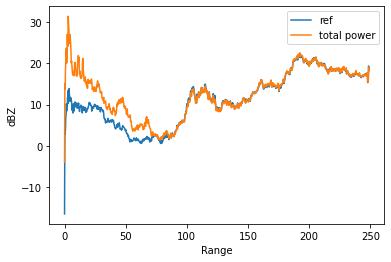

In [10]:
plt.plot(rng/1e3,ref[0:360].mean(axis=0),label='ref')
plt.plot(rng/1e3,tp[0:360].mean(axis=0),label='total power')
plt.xlabel('Range');plt.ylabel('dBZ')
plt.legend()

In [11]:
grid = pyart.io.read_grid('grid_GOA210514203814-IMD-B.nc')

In [12]:
grid.fields.keys()

dict_keys(['REF', 'VELH', 'WIDTHH', 'TP', 'ROI'])

In [13]:
gdisplay = pyart.graph.GridMapDisplay(grid)

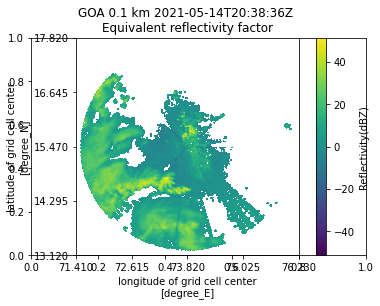

In [14]:
gdisplay.plot_grid('REF',0)

In [15]:
import xarray as xr

In [16]:
ds = xr.open_dataset('grid_GOA210514203814-IMD-B.nc')

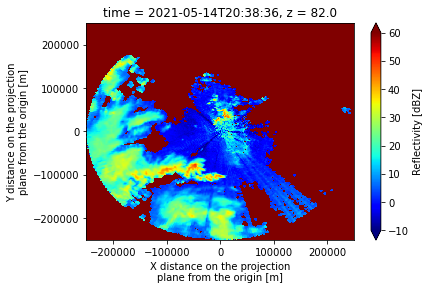

In [17]:
ds['REF'][0][0].plot(cmap='jet',vmin=-10,vmax=60)

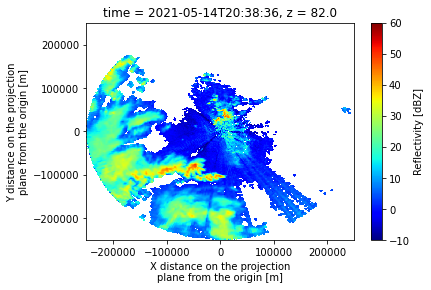

In [31]:
ref = ds.REF.where((ds.REF>-10)&(ds.REF<60))
ref[0,0].plot(cmap='jet',vmin=-10,vmax=60)

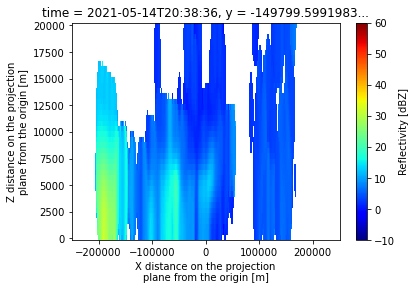

In [34]:
ref[0,:,100].plot(cmap='jet',vmin=-10,vmax=60)

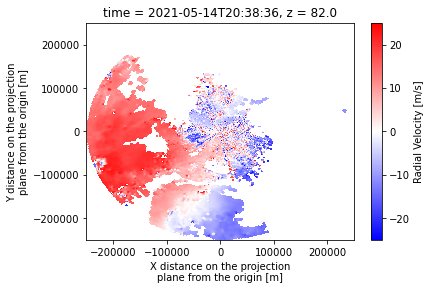

In [36]:
vel = ds.VELH.where((ds.VELH>-25)&(ds.VELH<25))
vel[0,0].plot(cmap='bwr',vmin=-25,vmax=25)